In [71]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

(array([7.0000e+00, 1.4400e+02, 2.0840e+03, 1.3399e+04, 3.3346e+04,
        3.1485e+04, 1.5957e+04, 3.2620e+03, 3.0500e+02, 1.0000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.9000e+01, 2.6900e+02, 1.6380e+03, 7.4730e+03, 1.6725e+04,
        2.7719e+04, 2.5211e+04, 1.3885e+04, 5.6140e+03, 1.2560e+03,
        1.6200e+02, 1.5000e+01, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        1.7000e+01, 1.3700e+02, 9.6200e+02, 3.9080e+03, 9.4960e+03,
        1.9366e+04, 2.4787e+04, 2.0369e+04, 1.3437e+04, 5.3510e+03,
        1.7560e+03, 3.7200e+02, 3.8000e+01, 1.0000e+00, 0.0000e+00,
        7.0000e+00, 5.9000e+01, 3.9500e+02, 1.6320e+03, 5.3520e+03,
        1.2529e+04, 1.8398e+04, 2.3453e+04, 1.9557e+04, 1.1134e+04,
        5.4280e+03, 1.6400e+03, 3.4500e+02, 5.8000e+01, 1.3000e+01]),
 array([0.068   , 0.074325, 0.08065 , 0.086975, 0.0933  , 0.099625,
        0.10595 , 0.112275, 0.1186  , 0.124925, 0.13125 , 0.137575,
        0.1439  , 0.150225, 0.15655 , 0.162875

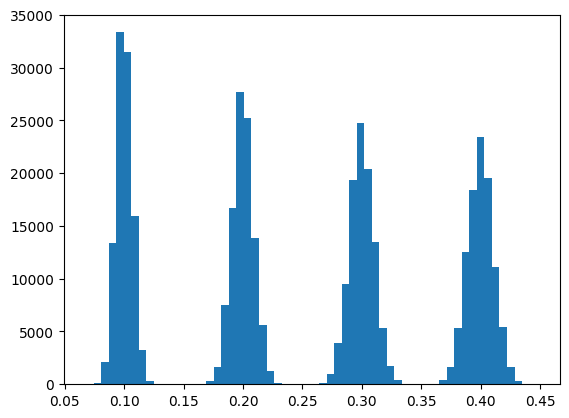

In [76]:
N = 2000

probs = [0.1, 0.2, 0.3, 0.4]

P = np.cumsum(probs)


def x():
    v = np.random.random(N)
    # A = v < 0.1
    # B = ~A & (v < 0.3)
    # C = ~A & ~B & (v < 0.6)

    # return A.sum()/N, B.sum()/N, C.sum()/N
    
    prev = 0
    out = []
    for p in P:
        p1 = (v < p).sum()
        out.append(p1-prev)
        prev = p1
    return np.array(out)/N


y = np.array([x() for _ in range(100000)]).flatten()
# plt.hist(y)
plt.hist(y, bins=60)

(array([6.1000e+01, 1.1790e+03, 8.1540e+03, 2.7706e+04, 3.4104e+04,
        2.2305e+04, 5.5820e+03, 8.6400e+02, 4.4000e+01, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        9.2000e+01, 9.0300e+02, 3.8970e+03, 1.2985e+04, 2.2402e+04,
        2.8278e+04, 1.9925e+04, 8.4360e+03, 2.5750e+03, 4.2900e+02,
        6.7000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        4.5000e+01, 3.7500e+02, 1.9250e+03, 5.7950e+03, 1.4478e+04,
        2.0918e+04, 2.4625e+04, 1.7155e+04, 9.8990e+03, 3.5710e+03,
        1.0130e+03, 1.7600e+02, 2.0000e+01, 3.0000e+00, 2.0000e+00,
        2.1000e+01, 1.1200e+02, 6.7700e+02, 2.4890e+03, 7.2140e+03,
        1.4835e+04, 1.9909e+04, 2.3313e+04, 1.6176e+04, 9.9720e+03,
        3.7080e+03, 1.2820e+03, 2.4000e+02, 4.6000e+01, 4.0000e+00]),
 array([145.  , 157.55, 170.1 , 182.65, 195.2 , 207.75, 220.3 , 232.85,
        245.4 , 257.95, 270.5 , 283.05, 295.6 , 308.15, 320.7 , 333.25,
        345.8 , 358.35, 370.9 , 383.45

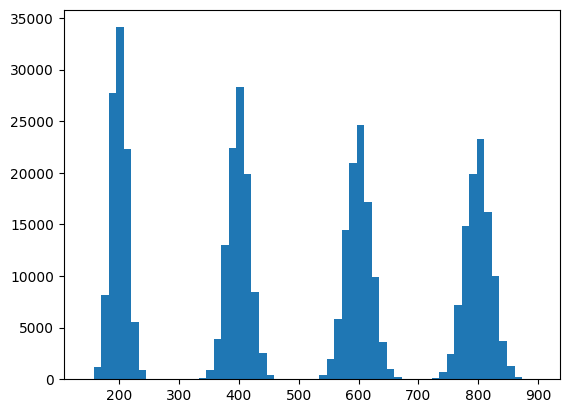

In [77]:
def random_partition(rel_probabilities: npt.ArrayLike, count: int) -> npt.NDArray:
    random_vals = np.random.random(count)
    distr = np.cumsum(rel_probabilities)
    distr /= distr[-1]
    return np.diff([0] + [np.sum(random_vals < threshold) for threshold in distr])


plt.hist(np.array([random_partition([1.0,2,3,4],2000) for _ in range(100000)]).flatten(), bins=60)

In [84]:
for x in range(100000):
    X = np.random.randint(1000)
    if np.sum(random_partition(np.random.random(10),X))-X != 0:
        raise